In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./GooglePlay.csv')
df1 = pd.read_csv('./Playstore_final.csv')

df.head()

C:\Users\Elham\AppData\Local\Temp\ipykernel_11076\2465176378.py:3: DtypeWarning: Columns (7,12,29,30,33,35,37,38,40,42,43,44,46,47,48,49,50,52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('./Playstore_final.csv')


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [3]:
df1.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Free,Price,Currency,...,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56
0,Logistics Management,com.eniseistudio.logistics_management,Education,4.090909,66.0,"10,000+",10000.0,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Estados Unidos Noticias,com.eniseistudio.news.estados_unidos,News & Magazines,4.000000,8.0,"1,000+",1000.0,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Dental Assistant,com.eniseistudio.dental_assistant,Education,3.866667,15.0,"10,000+",10000.0,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Medical Assistant,com.eniseistudio.course.medical_assistant,Education,4.000000,18.0,"5,000+",5000.0,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Business Administration,com.eniseistudio.majors.course.business_admini...,Education,4.023256,86.0,"50,000+",50000.0,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,10841.0,5420.000000,3129.671468,0.0,2710.0,5420.0,8130.0,10840.0
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


In [5]:
pd.options.display.float_format = '{:.2f}'.format

In [6]:

df = df.drop(columns='Unnamed: 0')
df = df.drop(df.index[10472])

for col in ['Reviews',	'Size',	'Installs',	'Price']:
  # extract numbers
  df[col] = df[col].str.extract('(\d+)')

  # cast as int
  df[col] = df[col].dropna().astype('int')

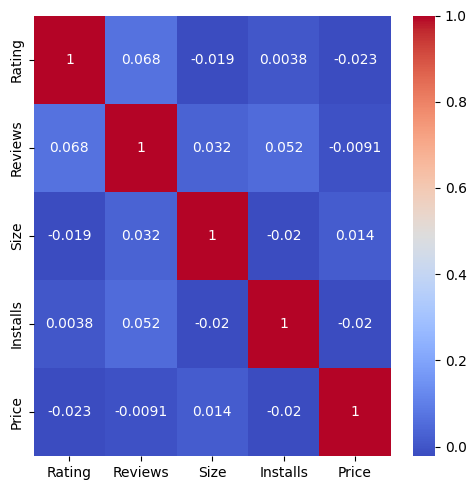

In [7]:
numeric_vals = df.select_dtypes(include=['number'])
numeric_corr = numeric_vals.corr()
plt.figure(figsize=(5, 5))
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm')
plt.tight_layout()
plt.show()

## Part 1 - Knowing the dataset

In [8]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19.00,10,Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14.00,500,Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.00,5,Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25.00,50,Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.00,100,Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [9]:
df1_copy = df1.copy()

In [88]:
def analyze_dataset(dataset : pd.DataFrame , Nominal , Ordinal , Numeric):
    results = []

    for column_name, column_data in dataset.items():
        # Initialize variables
        range_val = None
        min_val = None
        max_val = None
        mean_val = None
        mode = None
        median_val = None
        outliers = None
        
        inconsistencies = None  # Percentage of data out of range

        # Basic information
        data_type = column_data.dtype.name
        unique_values = column_data.unique()
        unique_count = len(unique_values)


        # Basic information
        data_type = column_data.dtype.name
        unique_values = column_data.unique()
        unique_count = len(unique_values)

        if column_name in Nominal:
            data_type = "Nominal"
            value_counts = column_data.value_counts()
            mode = value_counts.idxmax()

        elif column_name in Ordinal:
            data_type = "Ordinal"
            value_counts = column_data.value_counts()
            mode = value_counts.idxmax()

        elif column_name == "Type":
            data_type  = "Binary"
            value_counts = column_data.value_counts()
            mode = value_counts.idxmax()

        elif (Numeric != None and column_name in Numeric) or (Numeric is None):
            # Numeric column
            data_type = "Numeric"
            min_val = column_data.min()
            max_val = column_data.max()
            range_val = max_val - min_val
            mean_val = column_data.mean()
            mode = column_data.mode()[0]
            median_val = column_data.median()

            # Outliers
            data_std = column_data.std()
            q1 = column_data.quantile(0.25)
            q3 = column_data.quantile(0.75)
            iqr = q3 - q1
            outliers = column_data[(column_data < q1 - 1.5*iqr) | (column_data > q3 + 1.5*iqr)].tolist()
            total_data_points = len(column_data)
            out_of_range_data_points = len(outliers)
            inconsistencies = (out_of_range_data_points / total_data_points) * 100


        # Save results for this column
        results.append({
            "Name": column_name,
            "Type": data_type,
            "Range": range_val,
            "Min": min_val,
            "Max": max_val,
            "Mean": mean_val,
            "Mode": mode,
            "Median": median_val,
            "Outlier": outliers,
            "inconsistencies":inconsistencies

        })

    # Create a new DataFrame with the results
    df_results = pd.DataFrame(results)
    
    return df_results

**Multi Instance**

By calculating the outlier and then calculating the percentage of the data containing the outlier, the following adjectives have a multi-instantaneous error, which is calculated in the table in the `inconsistencies`  column.
`Price` , `Installs` , `Size` , `Reviews` , `Rating` 

In [89]:
Nominal = ['App', 'Category', 'Genres']
Ordinal = ['Content Rating', 'Last Updated', 'Current Ver', 'Android Ver']
analyze_dataset(df , Nominal , Ordinal , None)

,Name,Type,Range,Min,Max,Mean,Mode,Median,Outlier,inconsistencies
0,App,Nominal,NaN,NaN,NaN,NaN,ROBLOX,NaN,None,NaN
1,Category,Nominal,NaN,NaN,NaN,NaN,FAMILY,NaN,None,NaN
2,Rating,Numeric,4.00,1.00,5.00,4.19,4.40,4.30,"[3.2, 3.2, 3.1, 3.2, 3.2, 2.6, 3.1, 3.0, 1.9, ...",4.64
3,Reviews,Numeric,78158306.00,0.00,78158306.00,444152.90,0,2094.00,"[215644, 194216, 224399, 295221, 174531, 27192...",17.75
4,Size,Numeric,1019.00,1.00,1020.00,36.86,3.00,15.00,"[201.0, 79.0, 118.0, 695.0, 84.0, 97.0, 556.0,...",6.01
5,Installs,Numeric,500.00,0.00,500.00,72.41,10,10.00,"[500, 500, 500, 500, 500, 500, 500, 500, 500, ...",8.68
6,Type,Binary,NaN,NaN,NaN,NaN,Free,NaN,None,NaN
7,Price,Numeric,400.00,0.00,400.00,0.96,0,0.00,"[4, 4, 4, 4, 3, 3, 6, 1, 2, 3, 7, 3, 3, 5, 3, ...",6.01
8,Content Rating,Ordinal,NaN,NaN,NaN,NaN,Everyone,NaN,None,NaN
9,Genres,Nominal,NaN,NaN,NaN,NaN,Tools,NaN,None,NaN


In [13]:
unnamed_cols = [col for col in df1.columns if 'Unnamed' in col]  # Find unnamed columns
df1_copy = df1.drop(unnamed_cols, axis=1)  # Drop unnamed columns

print(df1_copy.columns)

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Free', 'Price', 'Currency', 'Size',
       'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last update', 'Privacy Policy',
       'Content Rating', 'Ad Supported', 'In app purchases', 'Editor Choice',
       'Summary', 'Reviews', 'Android version Text', 'Developer',
       'Developer Address', 'Developer Internal ID', 'Version'],
      dtype='object')


In [14]:
df1.describe()

,Rating,Rating Count,Minimum Installs,Price,Reviews,Developer Internal ID,Unnamed: 31,Unnamed: 32,Unnamed: 34,Unnamed: 36,Unnamed: 39,Unnamed: 41,Unnamed: 45,Unnamed: 51,Unnamed: 54,Unnamed: 55,Unnamed: 56
count,447982.00,332026.00,450781.00,450702.00,447982.00,450781.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00
mean,3.02,19429.24,883639.07,0.32,5118.34,6932303135092206592.00,3.74,203.00,100000.00,0.00,4.00,NaN,NaN,94.00,NaN,4869570000000000000.00,1.70
std,1.86,664291.65,36076301.76,4.11,199311.54,1342446038561089024.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.00,3.00,0.00,0.00,0.00,4611690000000000000.00,3.74,203.00,100000.00,0.00,4.00,NaN,NaN,94.00,NaN,4869570000000000000.00,1.70
25%,0.00,24.00,500.00,0.00,0.00,5771980000000000000.00,3.74,203.00,100000.00,0.00,4.00,NaN,NaN,94.00,NaN,4869570000000000000.00,1.70
50%,3.93,123.00,5000.00,0.00,17.00,6939070000000000000.00,3.74,203.00,100000.00,0.00,4.00,NaN,NaN,94.00,NaN,4869570000000000000.00,1.70
75%,4.39,990.00,50000.00,0.00,178.00,8109850000000000000.00,3.74,203.00,100000.00,0.00,4.00,NaN,NaN,94.00,NaN,4869570000000000000.00,1.70
max,5.00,138620959.00,10000000000.00,400.00,52377198.00,9223350000000000000.00,3.74,203.00,100000.00,0.00,4.00,NaN,NaN,94.00,NaN,4869570000000000000.00,1.70


In [15]:
for col in df1_copy.columns:
     new_df = df1_copy [ df1_copy[col].notna() ] 

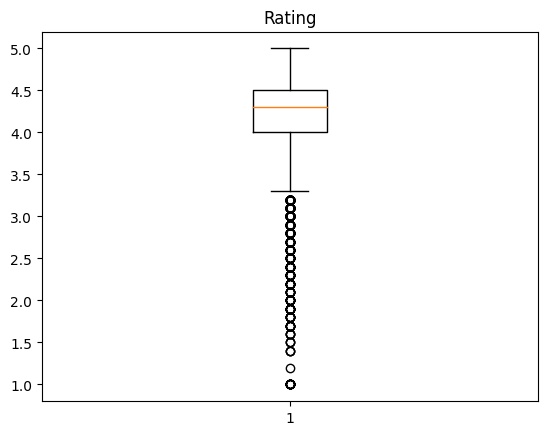

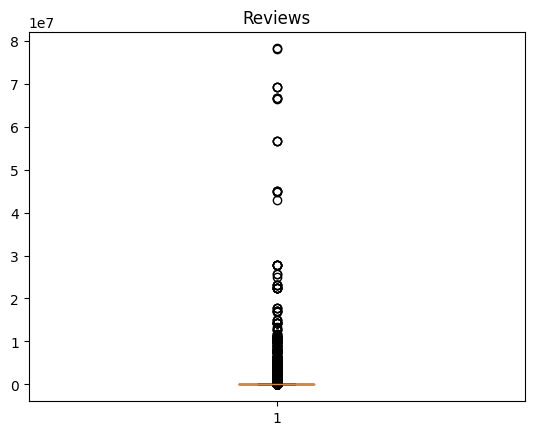

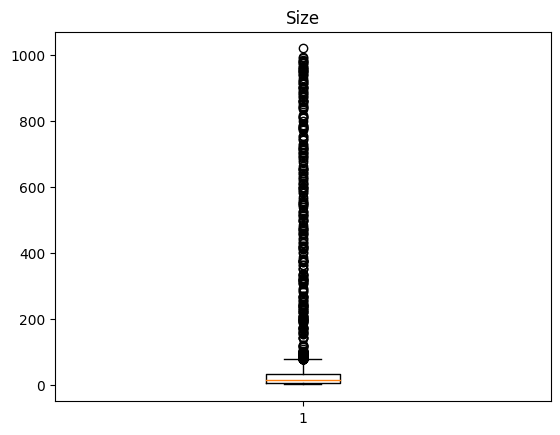

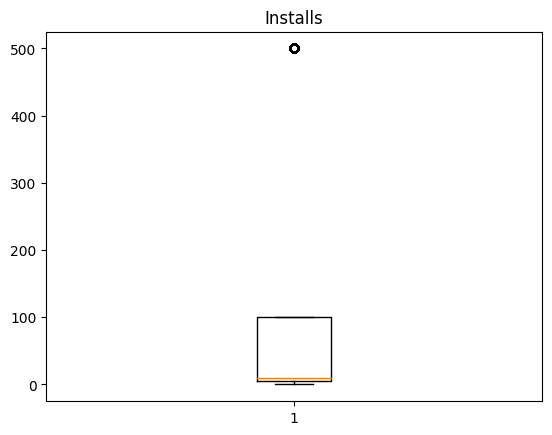

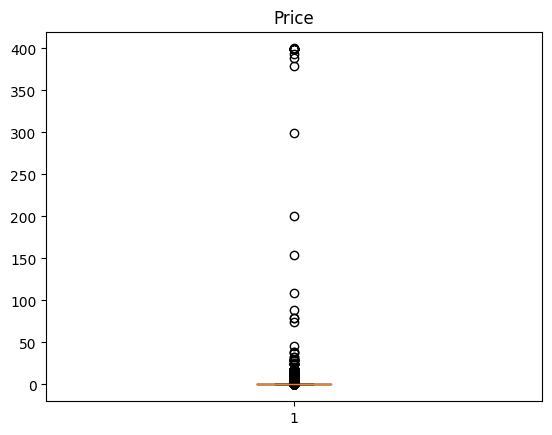

In [16]:
# numeric = ["Size", ]
numeric = df.select_dtypes(include=['number']).columns
for feature in numeric:
    # Create a box plot
    plt.boxplot(df[feature].dropna())
    # Add a title
    plt.title(feature)
    # Show the plot
    plt.show()

## Part 2 - Data Evaluation

**Single Schema**

`Size`, `Installs`, `Android version Text`,`Released`,`App Id`,`Privacy Policy`, `Version` They contain data outside the rule and are among the attributes with single schema errors

In [17]:

def calculate_percentage(column_values, condition):
    total_values = len(column_values)
    if callable(condition):  
        valid_values = column_values.apply(condition).sum()
    else:  
        valid_values = column_values.str.match(condition).sum()
    return (valid_values / total_values) * 100

regex_patterns = {
    'Free': '^True$|^False$',
    'Price': r'^\d+(\.\d+)?$',
    'Size' : r'^\d+(\.\d+)?[Mk]$',
    'Installs': r'^\d+(,\d+)?\+$',  
    'Rating': r'^[0-5](\.\d+)?$' ,
    'App Name': lambda x: isinstance(x, str),
    'Category': lambda x: isinstance(x, str),
    'Android version Text': r'^\d+(\.\d+)?(?: - \d+(\.\d+))?(?:W)? and up$',
    'App Id':'^com\.[a-zA-Z0-9_\.]+$',
    'Released':'^\d{1,2}-[A-Za-z]{3}-\d{2}$',
    'Privacy Policy': '^https?:\/\/.*$',
    'Developer Email': '^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$',
    'Content Rating': lambda x: isinstance(x, str) and x in ['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+', 'Unrated', 'Adults only 18+'],
    'Ad Supported': '^True$|^False$',
    'In app purchases': '^True$|^False$',
    'Editor Choice': '^True$|^False$',
    'Summary': lambda x: isinstance(x, str),  # No specific pattern for summary
    'Developer': lambda x: isinstance(x, str),  # No specific pattern for developer name
    'Developer Address': '^[a-zA-Z0-9\s.,\'-]+$',
    'Developer Internal ID':lambda x: isinstance(x, (int, float)),
    'Version': r'^\d+(\.\d+)+$'
}

percentages = {}
for column, pattern in regex_patterns.items():
    percentages[column] = calculate_percentage(new_df[column].astype(str), pattern)

print("validity:")
print(percentages)


validity:
{'Free': 99.98246863772438, 'Price': 99.98246863772438, 'Size': 95.14625372541448, 'Installs': 92.15393867573859, 'Rating': 99.3788571770956, 'App Name': 100.0, 'Category': 100.0, 'Android version Text': 88.89954085584117, 'App Id': 76.31490764966568, 'Released': 96.60091296233419, 'Privacy Policy': 88.70980269450381, 'Developer Email': 99.97558924240104, 'Content Rating': 100.0, 'Ad Supported': 62.35439537882167, 'In app purchases': 100.0, 'Editor Choice': 100.0, 'Summary': 100.0, 'Developer': 100.0, 'Developer Address': 81.39367672611796, 'Developer Internal ID': 0.0, 'Version': 73.37740584659836}


### ‫‪Currency‬‬

In [18]:
df["Last Updated"] = pd.to_datetime(df["Last Updated"], errors="coerce")
filtered_df = df[df['Last Updated'].dt.year.between(2015, 2018)]
update_counts_per_year_filtered = filtered_df['Last Updated'].dt.year.value_counts().sort_index()
update_percentages_per_year_filtered = (update_counts_per_year_filtered / filtered_df.shape[0]) * 100
print("Curretness googleplay dataset:")
print(update_percentages_per_year_filtered)


Curretness googleplay dataset:
Last Updated
2015    4.38
2016    7.67
2017   17.82
2018   70.13
Name: count, dtype: float64


C:\Users\Elham\AppData\Local\Temp\ipykernel_11076\3973852917.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Last Updated"] = pd.to_datetime(df["Last Updated"], errors="coerce")


In [43]:
new_df["Last update"] = pd.to_datetime(new_df["Last update"], errors="coerce")
filtered_df = new_df[new_df['Last update'].dt.year.between(2015, 2018)]
update_counts_per_year_filtered = filtered_df['Last update'].dt.year.value_counts().sort_index()
update_percentages_per_year_filtered = (update_counts_per_year_filtered / filtered_df.shape[0]) * 100
print("Curretness orginal dataset:")
print(update_percentages_per_year_filtered)


C:\Users\Elham\AppData\Local\Temp\ipykernel_11076\3998334250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Last update"] = pd.to_datetime(new_df["Last update"], errors="coerce")


Curretness orginal dataset:
Last update
2015    9.00
2016   16.25
2017   28.14
2018   46.61
Name: count, dtype: float64


In [20]:
total_rows = df.shape[0]
non_null_percentage = df.notnull().sum() / total_rows * 100

print("Completness:")
print(non_null_percentage)



Completness:
App              100.00
Category         100.00
Rating            86.40
Reviews          100.00
Size              84.36
Installs         100.00
Type              99.99
Price            100.00
Content Rating   100.00
Genres           100.00
Last Updated     100.00
Current Ver       99.93
Android Ver       99.98
dtype: float64


Some of the data in released are not in date format, it has a **single instant** error, and the data that is updated earlier than released has a **multi instant** error.

In [87]:
new_df['Released'] = pd.to_datetime(new_df['Released'], errors='coerce', infer_datetime_format=True)

inconsistencies = new_df[new_df['Last update'] < new_df['Released']]
num_inconsistencies = inconsistencies.shape[0]

if num_inconsistencies>0:
    print(f"Found {num_inconsistencies} inconsistencies where 'Last update' is before 'Released'.")
else:
    print("No inconsistencies found. All 'Last update' dates are after or equal to 'Released' dates.")


Found 828 inconsistencies where 'Last update' is before 'Released'.


C:\Users\Elham\AppData\Local\Temp\ipykernel_11076\690390030.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  new_df['Released'] = pd.to_datetime(new_df['Released'], errors='coerce', infer_datetime_format=True)
C:\Users\Elham\AppData\Local\Temp\ipykernel_11076\690390030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Released'] = pd.to_datetime(new_df['Released'], errors='coerce', infer_datetime_format=True)


**single schema**

Many columns contain null values, which we see in the results below, indicating a single schema error

In [21]:
total_rows1 = new_df.shape[0]
non_null_percentage1 = new_df.notnull().sum() / total_rows1 * 100
print("Completness:")
print(non_null_percentage1)

Completness:
App Name                100.00
App Id                  100.00
Category                100.00
Rating                   99.38
Rating Count             73.66
Installs                 99.98
Minimum Installs        100.00
Free                     99.98
Price                    99.98
Currency                 99.98
Size                    100.00
Minimum Android          99.76
Developer Id            100.00
Developer Website        75.66
Developer Email         100.00
Released                 99.24
Last update              97.32
Privacy Policy           88.73
Content Rating          100.00
Ad Supported             62.35
In app purchases        100.00
Editor Choice           100.00
Summary                  99.96
Reviews                  99.38
Android version Text     99.76
Developer               100.00
Developer Address        58.11
Developer Internal ID   100.00
Version                 100.00
dtype: float64


In [22]:
total_values = df.shape[0] * df.shape[1]
total_values1 = df1.shape[0] * df1.shape[1]

total_null_values = df.isnull().sum().sum()
total_null_values1 = df1.isnull().sum().sum()
total_non_null_values = total_values - total_null_values
total_non_null_values1 = total_values1 - total_null_values1

accuracy = total_non_null_values / total_values
accuracy1 = total_non_null_values1 / total_values1

print(f"Total Values: {total_values}")
print(f"Total Null Values: {total_null_values}")
print(f"Total Non-Null Values: {total_non_null_values}")
print(f"Accuracy (Non-Null Percentage): {accuracy:.3f}")

print(f"Total orginal dataset Values: {total_values1}")
print(f"Total orginal dataset Null Values: {total_null_values1}")
print(f"Total Non-Null orginal dataset Values: {total_non_null_values1}")
print(f"Accuracy orginal dataset (Non-Null Percentage): {accuracy1:.3f}")


Total Values: 140920
Total Null Values: 3180
Total Non-Null Values: 137740
Accuracy (Non-Null Percentage): 0.977
Total orginal dataset Values: 25695258
Total orginal dataset Null Values: 13272200
Total Non-Null orginal dataset Values: 12423058
Accuracy orginal dataset (Non-Null Percentage): 0.483


In [23]:
free_and_zero_price_count = new_df[(new_df['Free'] == True) & (new_df['Price'] == 0)]
not_free_and_positive_price_count = new_df[(new_df['Free'] == False) & (new_df['Price'] > 0)]

total_instances = len(new_df)
matching_instances = len(free_and_zero_price_count) + len(not_free_and_positive_price_count)

percentage_matching = (matching_instances / total_instances) * 100

print(f"Percentage of data matching the conditions: {percentage_matching:.2f}%")


Percentage of data matching the conditions: 99.98%


**Single Instance**


The output provided indicates **referential integrity violations**. This means there are rows in data where the `Developer Internal ID` is associated with multiple distinct values in the `Developer` or `Developer Email` columns.In a well-structured database, each `Developer Internal ID` should ideally reference a single `Developer` and a single `Developer Email`.

Possible causes for these violations include:
* **Data entry errors:** Duplicate entries or typos during data input can lead to inconsistencies.
* **Updates from multiple sources:** If data is updated from separate sources, one source might update `Developer` while another updates `Developer Email`, causing mismatches.


The `installs`, `size` columns have prepositions and have a misspelling error

In [46]:

violations = new_df.groupby('Developer Internal ID').agg(
    Unique_Developer_Count=pd.NamedAgg(column='Developer', aggfunc=lambda x: x.nunique()),
    Unique_Email_Count=pd.NamedAgg(column='Developer Email', aggfunc=lambda x: x.nunique())
).query('Unique_Developer_Count > 1 or Unique_Email_Count > 1')

if violations.empty:
  print("No referential integrity violations found.")
elif violations.shape[0] == 1 and violations['Unique_Developer_Count'].iloc[0] == 1 and violations['Unique_Email_Count'].iloc[0] > 1:
  print("Found single instance referential integrity violation (multiple emails for one developer).")
elif violations.shape[0] == 1 and violations['Unique_Developer_Count'].iloc[0] > 1 and violations['Unique_Email_Count'].iloc[0] == 1:
  print("Found single instance referential integrity violation (multiple developers for one email).")
else:
  print("Found referential integrity violations (multiple developers or emails per ID).")

Found referential integrity violations (multiple developers or emails per ID).


To improve the data quality, we remove outliers, nan, null, missing data, misspelling, out of format, pattern, etc. In general, we solve single instant, single schema, multi instant problems to achieve better quality.
correct inconsistent data, fill in missing values , identify outliers and smooth out noisy data